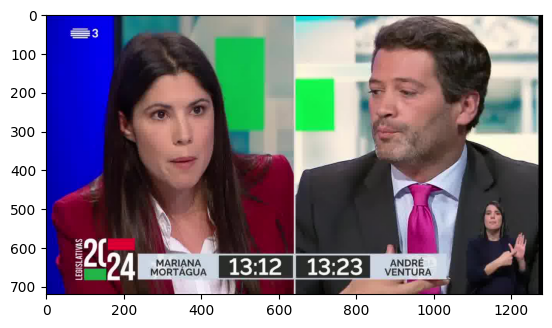

In [2]:
import pandas as pd
import os
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

# Load a pickle file
video = 'chega-be'
data = pd.read_pickle(os.path.join('processed', video + '.pkl'))
frame = 1234

img = Image.open(os.path.join('videos', video, data.iloc[frame]['filename']))
plt.imshow(img)
plt.show()

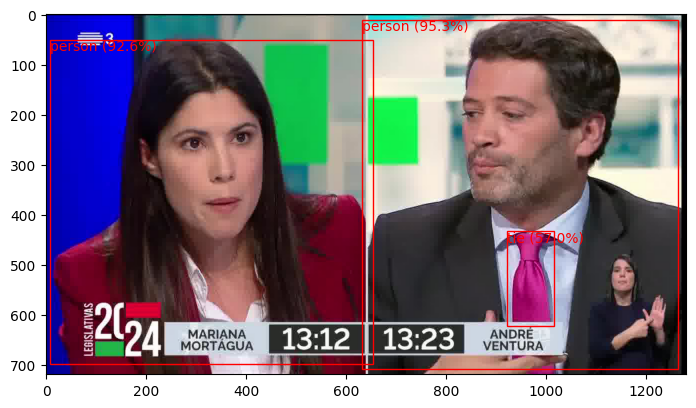

In [23]:
# detections

import matplotlib.patches as patches

fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
ax.imshow(img)

for bbox in data.iloc[frame]['detections']:
    
    # Create a rectangle patch
    rect = patches.Rectangle((bbox[0], bbox[1]), bbox[2], bbox[3], linewidth=1, edgecolor='r', facecolor='none')

    # Add patch to the image
    ax.add_patch(rect)

    ax.text(bbox[0], bbox[1], f'{bbox[4]} ({100*bbox[5]:.1f}%)',
            verticalalignment='top',
            color='r')

plt.show()

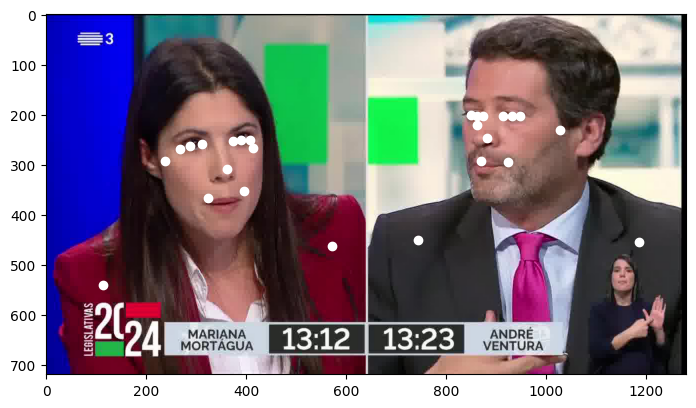

In [44]:
# poses

fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
ax.imshow(img)

width, height = img.size
for pose in np.array(data.iloc[frame]['poses']):

    # convert normalized landmark to pixel position
    x = np.floor(pose[:,0] * width)
    y = np.floor(pose[:,1] * height)

    for i in range(pose.shape[0]):
        if pose[i,3]>.5 and pose[i,4]>.5:
            plt.scatter(x[i], y[i], color='w')

plt.show()

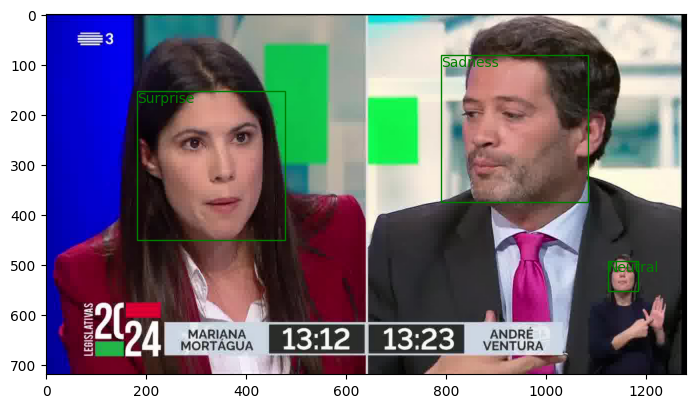

In [52]:
# Facial emotion recognition
idx_to_class={0: 'Anger', 1: 'Contempt', 2: 'Disgust', 3: 'Fear', 4: 'Happiness', 5: 'Neutral', 6: 'Sadness', 7: 'Surprise'}

fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
ax.imshow(img)

width, height = img.size
for fer in data.iloc[frame]['fer']:
    
    x = fer['location'][0]
    y = fer['location'][2]
    width = fer['location'][1] - fer['location'][0]
    height = fer['location'][3] - fer['location'][2]

    # Create a rectangle patch
    rect = patches.Rectangle((x, y), width, height, linewidth=1, edgecolor='g', facecolor='none')

    # Add patch to the image
    ax.add_patch(rect)

    ax.text(x, y, fer['emotion'],
            verticalalignment='top',
            color='g')

plt.show()